# EDA

final_traveler.csv 파일을 가볍게 살펴봅니다.


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# WSL2 font setting
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지

In [74]:
data_path = '../..//data/training/preprocessing/final_traveler.csv'
df = pd.read_csv(data_path)
pd.set_option('display.float_format', lambda x: f'{x:,.0f}')
print('shape:', df.shape)


shape: (2560, 80)


In [75]:
df.head()

,TRAVEL_ID,TRAVEL_NM,TRAVELER_ID,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,MVMN_NM,TRAVEL_PERSONA,TRAVEL_MISSION_CHECK,TRAVEL_PURPOSE_22,...,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_STATUS_YMD,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,TRAVEL_MOTIVE_3,TRAVEL_COMPANIONS_NUM
0,e_e000004,E03,e000004,3,2023-04-30,2023-05-01,NaN,서울 외 수도권 방문/수도권 거주/40세 이상/자녀동반/일반미션,3;4;11,0,...,2,5,경기도,경기,자녀 동반 여행,2023-04-29~2023-04-30,1,3,0,2
1,e_e000006,E03,e000006,21,2023-04-30,2023-05-02,NaN,경기 방문/거주지 구분 없음/39세 이하/특별미션,21;10;27,0,...,3,2,서울특별시,경기,2인 가족 여행,2023-04-30~2023-05-01,1,2,3,1
2,e_e000009,E03,e000009,2;4,2023-04-29,2023-05-01,NaN,서울 외 수도권 방문/수도권 거주/39세 이하/커플/일반미션,22;1;7,0,...,4,7,인천광역시,경기,2인 여행(가족 외),2023-04-29~2023-04-30,3,1,2,1
3,e_e000010,E01,e000010,3;6,2023-04-29,2023-05-01,NaN,서울 방문/수도권 외 거주/39세 이하/나홀로 여행/일반미션,6;3;1,0,...,5,3,경상남도,서울,나홀로 여행,2023-04-29~2023-04-30,8,1,2,0
4,e_e000011,E01,e000011,1;21,2023-04-28,2023-05-01,NaN,서울 방문/수도권 외 거주/40세 이상/커플/일반미션,6;2;24,0,...,6,6,경상남도,서울,3인 이상 여행(가족 외),2023-04-28~2023-04-30,3,7,1,3


In [76]:
# 활동, 숙박 관련 통계량
df[['activity_payment_sum', 'lodging_payment_sum', 'visit_trip_days']].describe()

,activity_payment_sum,lodging_payment_sum,visit_trip_days
count,"2,560","2,560","2,560"
mean,"148,345","43,377",2
std,"364,864","110,152",1
min,0,0,2
25%,"54,325",0,2
50%,"94,688",0,2
75%,"168,000",0,3
max,"15,071,450","1,320,000",6


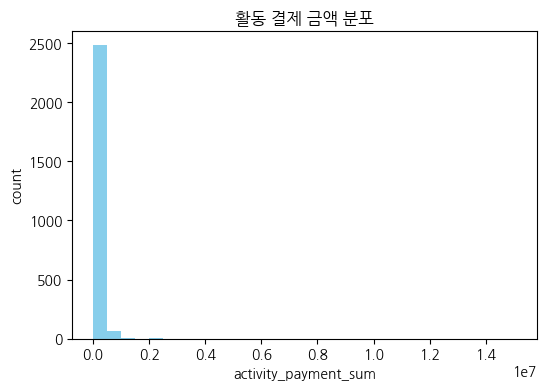

In [77]:
# 히스토그램
plt.figure(figsize=(6,4))
plt.hist(df['activity_payment_sum'], bins=30, color='skyblue')
plt.title('활동 결제 금액 분포')
plt.xlabel('activity_payment_sum')
plt.ylabel('count')
plt.show()

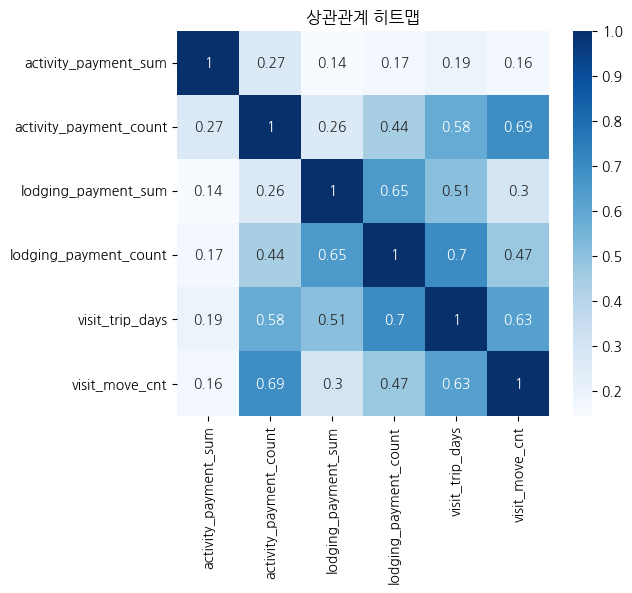

In [78]:
# heatmap으로 확인
simple_cols = ['activity_payment_sum', 'activity_payment_count', 'lodging_payment_sum', 'lodging_payment_count', 'visit_trip_days', 'visit_move_cnt']
corr = df[simple_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('상관관계 히트맵')
plt.show()

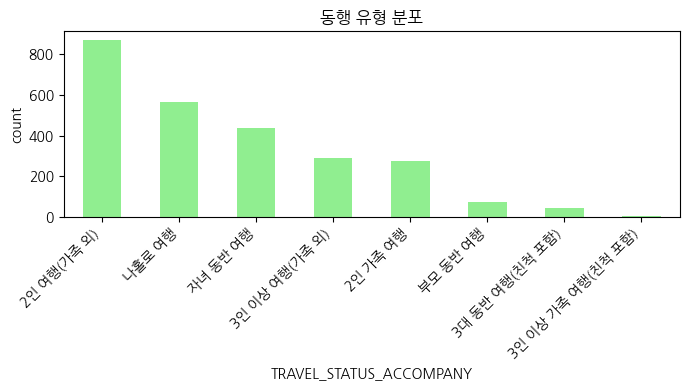

In [79]:
# 동행 유형 빈도를 막대그래프로 표현
plt.figure(figsize=(7,4))
df['TRAVEL_STATUS_ACCOMPANY'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('동행 유형 분포')
plt.ylabel('count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 산점도 그리기


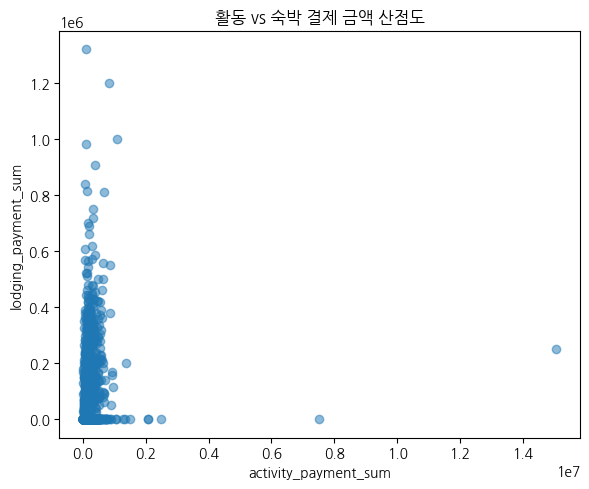

In [80]:
plt.figure(figsize=(6, 5))
plt.scatter(df['activity_payment_sum'], df['lodging_payment_sum'], alpha=0.5)
plt.title('활동 vs 숙박 결제 금액 산점도')
plt.xlabel('activity_payment_sum')
plt.ylabel('lodging_payment_sum')
plt.tight_layout()
plt.show()

## PCA로 2차원 차원축소


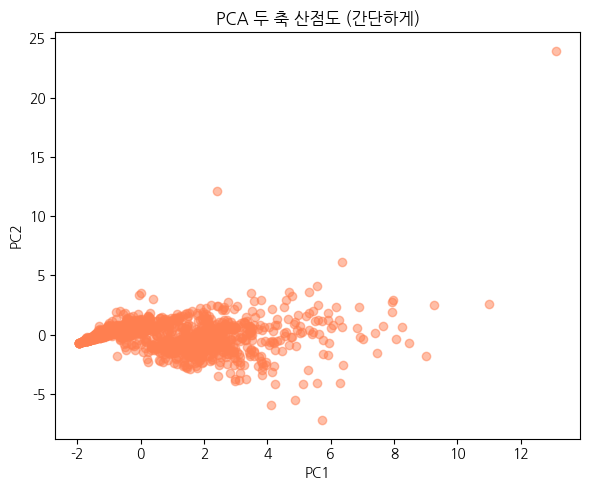

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca_cols = ['activity_payment_sum', 'activity_payment_count', 'lodging_payment_sum', 'lodging_payment_count', 'visit_trip_days', 'visit_move_cnt']
scaled = StandardScaler().fit_transform(df[pca_cols])
pca = PCA(n_components=2)
components = pca.fit_transform(scaled)
plt.figure(figsize=(6, 5))
plt.scatter(components[:, 0], components[:, 1], alpha=0.5, color='coral')
plt.title('PCA 두 축 산점도 (간단하게)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()